# Exploration of Capstone
## Requirements

In [1]:
from datetime import datetime

stock_symbol = 'aapl'
start_date = datetime.strptime('2017-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2016-12-31', '%Y-%m-%d')

print('Lets checkout {} for {} to {} now okay...'.format(stock_symbol.upper(), start_date.date(), end_date.date()))

Lets checkout AAPL for 2017-01-01 to 2016-12-31 now okay...


# Python for Finance by Yves Hilpisch
## Chapter 1 - Why Python for Finance

In [2]:
# from Python for Finance by Yves Hilpisch - chapter 1
import numpy as np
import pandas as pd
import pandas.io.data as web
# deprecated now pandas-datareader from https://github.com//pydata/pandas-datareader

goog = web.DataReader('GOOG', data_source='google',
                      start='3/14/2009', end='4/14/2014')
goog.tail()
# Features: Open, High, Low, Close, Volume -- missing Adjusted Close

/home/honeydew/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406.0
2014-04-09,559.62,565.37,552.95,564.14,3324742.0
2014-04-10,565.00,565.00,539.90,540.95,4027743.0
2014-04-11,532.55,540.00,526.53,530.60,3916171.0
2014-04-14,538.25,544.10,529.56,532.52,2568020.0


In [4]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = pd.rolling_std(goog['Log_Ret'],
                                    window=252) * np.sqrt(252)
# pd.rolling_std deprecated for Series use 
# Series.rolling(window=252,center=False().std()
# app.launch_new_instance()

/home/honeydew/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  app.launch_new_instance()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7adc534fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7adc468d10>], dtype=object)

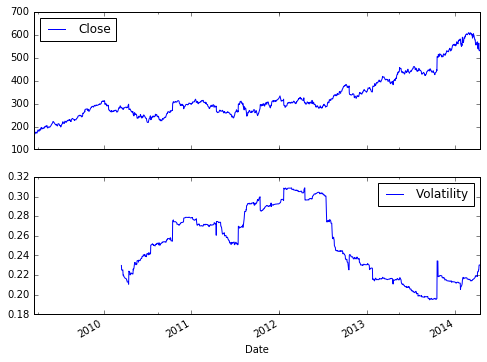

In [6]:
%matplotlib inline

goog[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6))

## Chapter 2 - Infrastructure and Tools
Python Quant Platform @ https://analytics.quant-platform.com (or http://pqp.io/ ?)

### Jupyter Notebook Documentation
http://ipython.org/documentation.html

Equation in Latex - S_T = S_0 \exp((r - 0.5\sigma^2) T + \sigma \sqrt{T} z)

#### Listing of magic commands
%lsmagic

#### Quick Reference
%quickref

#### Help
help

## Chapter 3 - Introductory Examples

Example 3.1 shows code for Black-Scholes-Merton option pricing formula

### Monte Carlo simulation
* applications
* efficiency of algorithm implementation (implications for memory use)
* implementation examples

### Technical Analysis
"In finance, technical analysis is a security analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume." http://en.wikipedia.org/wiki/Technical_analysis

The benchmark index of Standard & Poor's 500 (S&P 500) used for analysis examples to study the entire market.

In [8]:
# import numpy as np
# import pandas as pd
# import pandas.io.data as web

sp500 = web.DataReader('^GSPC', data_source='yahoo',
                       start='1/1/2000', end='4/14/2014')
sp500.info()
# IOError: after 3 tries, Yahoo! did not return a 200 (HTTP OK)
# for url 'http://ichart.finance.yahoo.com/table.csv?s=^GSPC&a=0&b=1&c=2000&d=3&e=14&f=2014&g=d&ignore=.csv'

IOError: after 3 tries, Yahoo! did not return a 200 for url 'http://ichart.finance.yahoo.com/table.csv?s=^GSPC&a=0&b=1&c=2000&d=3&e=14&f=2014&g=d&ignore=.csv'

In [9]:
# Yahoo! Finance data resolution
import pandas_datareader.data as wb

amzn = wb.get_quote_yahoo('AMZN')
amzn

,PE,change_pct,last,short_ratio,time
AMZN,189.59,+1.08%,1006.73,2.09,4:00pm


In [10]:
# Now retry earlier code
#sp500 = web.DataReader('^GSPC', data_source='yahoo',
#                       start='1/1/2000', end='4/14/2014')
#sp500.info()
sp500 = wb.get_quote_yahoo('^GSPC')
sp500

,PE,change_pct,last,short_ratio,time
^GSPC,N/A,+0.37%,2439.07,N/A,4:44pm


TODO: identify fix for Yahoo! Finance data download issues, then review S&P500 examples.

In [8]:
import pandas_datareader as pdr

pdr.get_data_yahoo('AAPL')
# RemoteDataError: Unable to 
# read URL: http://ichart.finance.yahoo.com/table.csv?a=0&ignore=.csv&s=AAPL&b=1&e=3&d=5&g=d&f=2017&c=2010

RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv?a=0&ignore=.csv&s=AAPL&b=1&e=3&d=5&g=d&f=2017&c=2010

In [11]:
gs = wb.DataReader("GS", data_source='yahoo', start='2006-01-01',
                    end='2010-01-01')
gs.head()
# RemoteDataError: Unable to 
# read URL: http://ichart.finance.yahoo.com/table.csv?a=0&ignore=.csv&s=GS&b=1&e=1&d=0&g=d&f=2010&c=2006

RemoteDataError: Unable to read URL: http://ichart.finance.yahoo.com/table.csv?a=0&ignore=.csv&s=GS&b=1&e=1&d=0&g=d&f=2010&c=2006